In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [248]:
data = pd.read_csv('../data/raw_postpro.csv', encoding = 'cp949')
# 컬럼 삭제
df = data.drop(['청구서번호','No.',  '선박입고','완료 여부','리드타임_음수제거','청구량','견적','견적수량','견적화폐','견적단가','발주번호','발주','발주수량','발주금액','미입고 기간','리드타임','창고입고','창고입고수량','입고창고','창고출고','창고출고수량','출고선박','출고운반선','선박입고','선박입고수량','완료 여부'], axis=1)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Subject      20517 non-null  object
 1   Machinery    20517 non-null  object
 2   Assembly     20517 non-null  object
 3   청구품목         20517 non-null  object
 4   Part No.1    20517 non-null  object
 5   Part No.2    20517 non-null  object
 6   key1         20517 non-null  object
 7   key2         20517 non-null  object
 8   발주처          20517 non-null  object
 9   D/T          20517 non-null  object
 10  Control No.  20517 non-null  object
dtypes: object(11)
memory usage: 1.7+ MB


In [250]:
df = df[['청구품목','발주처','Machinery', 'Assembly' , "Part No.1", "Part No.2",'key2']]
# 'Machinery', 'Assembly', '청구품목', 'Part No.1', 'Part No.2', 'key1', '발주처'

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   청구품목       20517 non-null  object
 1   발주처        20517 non-null  object
 2   Machinery  20517 non-null  object
 3   Assembly   20517 non-null  object
 4   Part No.1  20517 non-null  object
 5   Part No.2  20517 non-null  object
 6   key2       20517 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [252]:
from sklearn import preprocessing
label_encoders = {}  # 각 열에 대한 LabelEncoder를 저장하기 위한 딕셔너리
columns_to_encode = ['key2']  # 인코딩을 수행할 열의 이름 리스트

for column in columns_to_encode:
    le = preprocessing.LabelEncoder()
    le.fit(df[column])
    label_encoders[column] = le # 딕셔너리에 저장
    df[column+"_encoded"] = le.transform(df[column]) # 새로운 encoding 된 컬럼 추가

In [253]:
df = df.drop(['key2'], axis=1)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   청구품목          20517 non-null  object
 1   발주처           20517 non-null  object
 2   Machinery     20517 non-null  object
 3   Assembly      20517 non-null  object
 4   Part No.1     20517 non-null  object
 5   Part No.2     20517 non-null  object
 6   key2_encoded  20517 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 1.0+ MB


In [255]:
# df_desc = df[[ '청구품목', '발주처']].apply(lambda row: ' '.join(row), axis=1)
df_desc = df[[ '청구품목', '발주처','Machinery', 'Assembly' , "Part No.1", "Part No.2"]].apply(lambda row: ' '.join(row), axis=1)

In [256]:
lis = df_desc.values

In [257]:
cnt = 0
for i in lis:
    print(i)
    cnt += 1
    if cnt == 20:
        break

SEAL-O-RING-STOR HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 323-6480 LINES GP-FUEL  7.00E-275 0
OIL COOLER & LINES HAEIN Coporation_Cheonan NO.2 GENERATOR ENGINE GASKET KIT 7.00E-275 0
WASHER HAEIN Coporation_Cheonan NO.2 GENERATOR ENGINE 285-8374 MANIFOLD GP-EXH  7.00E-275 0
BOLT-HIGH TEMP HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 159-8828 TURBO GP 7.00E-275 0
SEAL HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 2N4727 INSTRUMNT PANEL GP 7.00E-275 0
CORE CHARGES FOR CYLINDER PACK AS HAEIN Coporation_Cheonan NO.2 GENERATOR ENGINE 8N-6224 PISTON GP-ROD& 7.00E-275 0
PUMP GP-F TFR-REMAN HAEIN Coporation_Cheonan NO.3 GENERATOR ENGINE 8N-6151 PUMP GP-F TFR  7.00E-275 0
GEAR-WTR PUMP DR HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 8N-7174 GEAR GP-FRONT  7.00E-275 0
GEAR-WTR PUMP DR HAEIN Coporation_Cheonan NO.3 GENERATOR ENGINE 8N-7174 GEAR GP-FRONT  7.00E-275 0
GEAR-WTR PUMP DR HAEIN Coporation_Cheonan NO.3 GENERATOR ENGINE 8N-7174 GEAR GP-FRONT  7.00E-275 0
GEAR-WTR PUMP DR HAEIN

In [191]:
# vocab_list = []
# for words in df_desc.str.split():
#   if isinstance(words, list):
#     #print(type(words), words)
#     vocab_list = vocab_list + words
# len(vocab_list)

# 단어갯수

In [258]:
desc = df_desc.to_frame()

In [259]:
desc['key2'] = df['key2_encoded']

In [260]:
desc

,0,key2
0,SEAL-O-RING-STOR HAEIN Coporation_Cheonan NO.1...,18
1,OIL COOLER & LINES HAEIN Coporation_Cheonan NO...,18
2,WASHER HAEIN Coporation_Cheonan NO.2 GENERATOR...,18
3,BOLT-HIGH TEMP HAEIN Coporation_Cheonan NO.1 G...,18
4,SEAL HAEIN Coporation_Cheonan NO.1 GENERATOR E...,18
...,...,...
20512,HYD. CYLINDER_NET BOAT DAVIT MARINE HYDROTEC C...,20
20513,HYD. CYLINDER_N.D CRANE_BOOM_LIFTER MARINE HYD...,20
20514,"PULLY PORT RELIEF ENGINEERING CO.,LTD. 6M NET ...",5
20515,"CYLINDER PORT RELIEF ENGINEERING CO.,LTD. 7M ...",20


In [261]:
desc.columns = ['origin','key2']

In [262]:
desc.head()

,origin,key2
0,SEAL-O-RING-STOR HAEIN Coporation_Cheonan NO.1...,18
1,OIL COOLER & LINES HAEIN Coporation_Cheonan NO...,18
2,WASHER HAEIN Coporation_Cheonan NO.2 GENERATOR...,18
3,BOLT-HIGH TEMP HAEIN Coporation_Cheonan NO.1 G...,18
4,SEAL HAEIN Coporation_Cheonan NO.1 GENERATOR E...,18


In [263]:
X = desc['origin'].values

In [264]:
y = desc['key2'].values

In [265]:
X,y

(array(['SEAL-O-RING-STOR HAEIN Coporation_Cheonan NO.1 GENERATOR ENGINE 323-6480 LINES GP-FUEL  7.00E-275 0',
        'OIL COOLER & LINES HAEIN Coporation_Cheonan NO.2 GENERATOR ENGINE GASKET KIT 7.00E-275 0',
        'WASHER HAEIN Coporation_Cheonan NO.2 GENERATOR ENGINE 285-8374 MANIFOLD GP-EXH  7.00E-275 0',
        ...,
        'PULLY PORT RELIEF ENGINEERING CO.,LTD. 6M NET BOAT ELECTRIC CLUTCH Φ305X5V-3 0',
        'CYLINDER  PORT RELIEF ENGINEERING CO.,LTD. 7M NET BOAT HAND HYDRAULIC STEERING SYSTEM Φ50 x S195 CYLINDER 0',
        'SEAL KIT FOR CYLINDER PORT RELIEF ENGINEERING CO.,LTD. 7M NET BOAT HAND HYDRAULIC STEERING SYSTEM Φ50 x S195 CYLINDER SEAL KIT 0'],
       dtype=object),
 array([18, 18, 18, ...,  5, 20, 20]))

In [266]:
# 학습에 사용할 단어장
tokenizer = tf.keras.preprocessing.text.Tokenizer()

# 토큰화
tokenizer.fit_on_texts(X)
print(len(tokenizer.word_index))

12218


In [267]:
x = tokenizer.texts_to_sequences(X)

In [269]:
cnt = [len(i) for i in x ]

In [270]:
max(cnt), sum(cnt)/len(cnt)

(35, 17.162938051372034)

In [271]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_X = pad_sequences(x,30)

In [272]:
padded_X.shape

(20517, 30)

In [273]:
# 총 단어 갯수
word_size = len(tokenizer.word_index) +1

In [353]:
from keras.models import Sequential, Model
from keras.layers import Input, Embedding, Dense, concatenate, Flatten, Conv1D, GlobalMaxPooling1D, LSTM,Dropout,MaxPooling1D

model = Sequential()
model.add(Embedding(word_size, 40, input_length=30))

model.add(Dropout(0.1))
model.add(Conv1D(128, 10, padding = 'same', activation = 'relu')) # , strides=1
model.add(MaxPooling1D(pool_size=4))

model.add(LSTM(128, return_sequences=True))  # LSTM 레이어 추가
model.add(Flatten())
# model.add(Dense(64, activation='relu', name='Dense_output'))
model.add(Dense(61, activation='softmax', name="Prediction_output"))

In [354]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 30, 40)            488760    
                                                                 
 dropout_8 (Dropout)         (None, 30, 40)            0         
                                                                 
 conv1d_8 (Conv1D)           (None, 30, 128)           51328     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 7, 128)           0         
 1D)                                                             
                                                                 
 lstm_18 (LSTM)              (None, 7, 128)            131584    
                                                                 
 flatten_18 (Flatten)        (None, 896)               0         
                                                     

In [355]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
# optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
# optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.01)
# optimizer = tf.keras.optimizers.Adamax(learning_rate=0.01)

In [356]:
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#                        optimizer=optimizer,
#                        metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])
from keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor = 'val_loss' , patience = 5)

In [357]:
# 데이터를 학습용과 검증용으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_X, y, test_size=0.4, random_state=42,shuffle=True)

# padded_X, y 오버샘플링

In [358]:
from imblearn.over_sampling import RandomOverSampler

# RandomOverSampler를 사용하여 데이터 오버샘플링
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(padded_X, y)

In [359]:
X_oversampled.shape

(243878, 30)

In [360]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42,shuffle=True)

# from sklearn.model_selection import train_test_split

# # 오버샘플링된 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42, shuffle=True)

# # 훈련 데이터와 검증 데이터 분할
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

In [347]:
# 딥러닝 모델을 만들기 위해 categorical 함수 사용
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, num_classes=61)
y_test_categorical = to_categorical(y_test, num_classes=61)

Epoch 1/10
1220/1220 [==============================] - 10s 7ms/step - loss: 0.6908 - accuracy: 0.8387 - val_loss: 0.0527 - val_accuracy: 0.9893
Epoch 2/10
1220/1220 [==============================] - 8s 7ms/step - loss: 0.0288 - accuracy: 0.9942 - val_loss: 0.0178 - val_accuracy: 0.9965
Epoch 3/10
1220/1220 [==============================] - 8s 7ms/step - loss: 0.0099 - accuracy: 0.9979 - val_loss: 0.0137 - val_accuracy: 0.9969
Epoch 4/10
1220/1220 [==============================] - 8s 7ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.0115 - val_accuracy: 0.9975
Epoch 5/10
1220/1220 [==============================] - 8s 7ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0114 - val_accuracy: 0.9977
Epoch 6/10
1220/1220 [==============================] - 8s 7ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0106 - val_accuracy: 0.9982
Epoch 7/10
1220/1220 [==============================] - 8s 7ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0133 - val_accuracy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


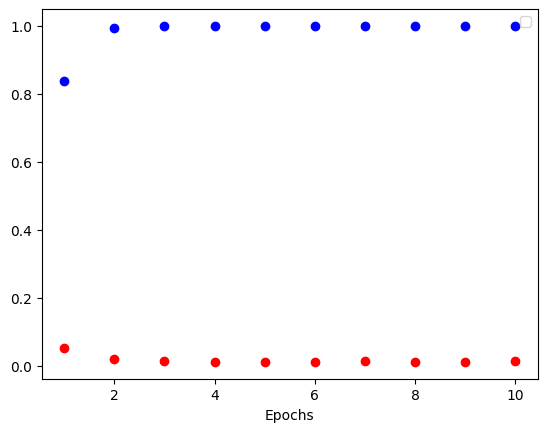

In [348]:
history = model.fit(X_train,y_train_categorical, validation_split =0.2, epochs= 10, batch_size=128,callbacks = [early_stopping_callback])
# history = model.fit(X_train, y_train_categorical, epochs=10, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping_callback])

import matplotlib.pyplot as plt

# 손실 값 추출
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

# 에포크 수
epochs = range(1, len(y_vloss) + 1)

# 학습 곡선 그리기
plt.plot(epochs, y_vloss, "o", c ='red')
plt.plot(epochs, y_acc, "o", c ='blue')
plt.xlabel('Epochs')
# plt.ylabel('Loss')
plt.legend()
plt.show()

In [349]:
y_pred= model.predict(X_test)

1525/1525 [==============================] - 3s 2ms/step


In [350]:
# y_pred 랑 y_test 를 원래 labeling 된 데이터로 변환
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

In [351]:
y_pred_classes[:100],y_test_classes[:100]

(array([32, 37, 38, 52,  3, 48,  7, 53, 25, 31,  2, 49, 10,  2,  9,  4, 24,
        29, 53, 39,  8, 59, 56, 60,  9, 46, 15, 35, 15, 11, 54, 49,  6, 45,
         5, 44, 43, 58, 53, 25, 37, 60, 13, 29, 46,  4, 49, 40, 16,  9, 21,
        47, 42, 16, 13, 50, 44, 12, 49, 27, 26, 41, 19, 10,  8, 60, 11,  0,
         6,  3, 22, 10, 20, 59, 36, 23,  1, 30, 38, 15, 52, 21, 45, 27, 39,
         9, 37, 24, 55,  5, 12, 11, 30, 52, 52, 26, 19, 28, 13, 55],
       dtype=int64),
 array([32, 37, 38, 52,  3, 48,  7, 53, 25, 31,  2, 49, 10,  2,  9,  4, 24,
        29, 53, 39,  8, 59, 56, 60,  9, 46, 15, 35, 15, 11, 54, 49,  6, 45,
         5, 44, 43, 58, 53, 25, 37, 60, 13, 29, 46,  4, 49, 40, 16,  9, 21,
        47, 42, 16, 13, 50, 44, 12, 49, 27, 26, 41, 19, 10,  8, 60, 11,  0,
         6,  3, 22, 10, 20, 59, 36, 23,  1, 30, 38, 15, 52, 21, 45, 27, 39,
         9, 37, 24, 55,  5, 12, 11, 30, 52, 52, 26, 19, 28, 13, 55],
       dtype=int64))

In [352]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
f1 = f1_score(y_pred_classes, y_test_classes, average='macro')
f1

0.9980449785791582

In [ ]:
# 단어장을 이용해 문장을 숫자로 변경
encoded_text=tokenizer.texts_to_sequences(pre_desc['split_desc'])
pre_desc['encode_desc'] = tokenizer.texts_to_sequences(pre_desc['split_desc'])

In [ ]:
len_list = pre_desc['encode_desc'].apply(lambda x: len(x))
max(len_list), sum(len_list)/len(len_list)

In [ ]:
top_words = 1000
max_len = 10
vector_len = 30

In [ ]:
# OOV: Out-Of-Vocabulary
# 사전에서 빈도수 높은 단어 1,000 개만 사용
# 사전에 없는 단어 <OOV> 처리
tokenizer2 = tf.keras.preprocessing.text.Tokenizer(num_words=top_words, oov_token='<OOV>')
tokenizer2.fit_on_texts(pre_desc['split_desc'])
# print('tokenizer2.index_docs', tokenizer2.index_docs)
# print('tokenizer2.index_word', tokenizer2.index_word)
# print('tokenizer2.word_index', tokenizer2.word_index)
pre_desc['encode_desc_1000'] = tokenizer2.texts_to_sequences(pre_desc['split_desc'])

In [ ]:
pre_desc.head(10)

In [ ]:
# 문장의 길이가 다르므로 일치
encode_desc_padding = tf.keras.preprocessing.sequence.pad_sequences(pre_desc['encode_desc_1000'], maxlen=max_len)

In [ ]:
encode_desc_padding.shape

In [ ]:
encode_desc_padding[:5]

In [ ]:
embedding = tf.keras.layers.Embedding(input_dim =top_words, output_dim=vector_len)(encode_desc_padding)
embedding.shape

## 임베딩 데이터 셋

In [ ]:
batch_size = 5
def embedding_dataset(data, shuffle=True, batch_size=32):
  ds = tf.data.Dataset.from_tensor_slices({'desc': data})
  if shuffle:
    ds = ds.shuffle(buffer_size=len(data))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [ ]:
embedding_dataset = embedding_dataset(encode_desc_padding, batch_size=batch_size)

In [ ]:
for batch in embedding_dataset.take(1):
  print(batch)

In [ ]:
embedding = tf.keras.layers.Embedding(input_dim =top_words, output_dim=vector_len)

In [ ]:
embedding_layer = lambda feature: embedding(feature)

In [ ]:
embedding_layer(encode_desc_padding).shape

In [ ]:
embedding_dataset.element_spec['desc'].shape[1]

In [ ]:
embedding_col = tf.keras.Input(shape=(), name='desc', dtype='int64')

In [ ]:
def get_text_encoding_layer(name, dataset, top_words, vector_len):
   # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x: x[name])
  embedding = tf.keras.layers.Embedding(input_dim =top_words, output_dim=vector_len)
  return lambda feature: embedding(feature)

In [ ]:
embedding_layer = get_text_encoding_layer('desc', embedding_dataset, top_words, vector_len)

In [ ]:
embedding_layer(embedding_col)

In [ ]:
all_inputs = []
encoded_features = []

In [ ]:
# text features.
for header in ['desc']:
  embedding_col = tf.keras.Input(shape=(), name='desc', dtype='int64')
  embedding_layer = get_text_encoding_layer('desc', embedding_dataset, top_words, vector_len)
  encoded_embedding_col = embedding_layer(embedding_col)
  all_inputs.append(embedding_col)
  encoded_features.append(encoded_embedding_col)

In [ ]:
for d in all_inputs:
  print(type(d), d.shape)

In [ ]:
for d in encoded_features:
  print(type(d), d.shape)

In [ ]:
from keras.layers import Input, Embedding, Dense
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(64, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)
# outputs = Dense(61, activation='softmax', name="Prediction_output")(x)

model2 = tf.keras.Model(all_inputs, output)

model2.summary()

In [ ]:
# optimizer=tf.keras.optimizers.Adam()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [ ]:
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                       optimizer=optimizer,
                       metrics=['accuracy'])

In [ ]:
model2.fit(embedding_dataset,y_train, epochs=10, batch_size=32)

In [ ]:
def df_to_dataset(data, shuffle=True, batch_size=32):
  ds = tf.data.Dataset.from_tensor_slices({'desc': data})
  if shuffle:
    ds = ds.shuffle(buffer_size=len(data))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [ ]:
embedding_dataset = df_to_dataset(encode_desc_padding, batch_size=batch_size)

In [ ]:
encode_desc_padding

In [ ]:
df2 = pd.DataFrame()
df2['desc'] = pre_desc['origin']
df2['y'] = df['key2_encoded']

In [ ]:
y = df2['y'].values

In [ ]:
y

In [ ]:
X = df2['desc']

In [ ]:
# 데이터를 학습용과 검증용으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [ ]:
# 딥러닝 모델을 만들기 위해 categorical 함수 사용
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, num_classes=61)
y_test_categorical = to_categorical(y_test, num_classes=61)

In [ ]:
X_train

In [ ]:
# train set
train_features = X_train.values
train_labels = y_train_categorical
# features= {
#    'desc': X_train.values,
# }
# labels = y_train_categorical

# tf.data.Dataset 생성
train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [ ]:
model2.fit(train_dataset, epochs=10, batch_size=32)

In [ ]:
# test set
predict_features = {
   'desc': X_test.values,
}

In [ ]:
# Apply the preprocessing in tf.data.Dataset.map.
dataset = tf.data.Dataset.from_tensor_slices((features, labels)).batch(1)
dataset = dataset.map(lambda x, y: (preprocessing_model(x), y),
                      num_parallel_calls=tf.data.AUTOTUNE)
# Display a preprocessed input sample.
next(dataset.take(1).as_numpy_iterator())

In [ ]:
pre_desc.head(10)

In [ ]:
# 입력 데이터와 레이블 데이터 준비
train_features = ...
train_labels = ...

# tf.data.Dataset 생성
train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [ ]:
df.head()

In [ ]:
df2= df.copy()

In [ ]:
df2